# Multiple Linear Regression

In this repository I do not explain in detail what and how I am doing, if you do want to know however feel free to contact me.<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('50_Startups.csv')
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [3]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
labelencoder_x = LabelEncoder()
x[:, -1] = labelencoder_x.fit_transform(x[:, -1])

I have used various libraries here as per my convenience you can use other methods (best to try and create a function for yourself) as long as it achieves the same goal.

In [4]:
encoded = to_categorical(x[:, -1])
x = np.append(arr = encoded, values = x, axis = 1)
x = np.delete(x, 6, 1)
x = np.array(x, dtype=float)

Here I noticed a dummy variable trap

In [5]:
x = x[:, 1:]

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 1/5,
                                                    random_state = 0)

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Again you could try to build the model from scratch. <br>
(I might add that in this repository later as I did in the Simple Linear Regression repo)

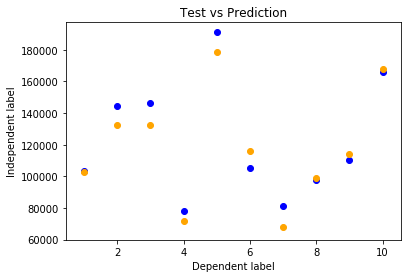

In [8]:
y_pred = regressor.predict(x_test)

plt.scatter(np.array([1,2,3,4,5,6,7,8,9,10]), y_test, color = 'blue')
plt.scatter(np.array([1,2,3,4,5,6,7,8,9,10]), y_pred, color = 'orange')
plt.title("Test vs Prediction")
plt.xlabel("Dependent label"), plt.ylabel("Independent label")
plt.show()

## Now we compare it to our OLS Multiple Linear Model

In [9]:
import statsmodels.api as sm
x = np.append(arr = np.ones((50, 1)).astype(int), values = x, axis = 1)
x_test = np.append(arr=np.ones((10, 1)).astype(int),
                   values = x_test, axis = 1)

x_opt = x[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = x_opt).fit()
print(regressor_OLS.summary())

x_opt = x[:, [0, 1, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = x_opt).fit()
print(regressor_OLS.summary())

x_opt = x[:, [0, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = x_opt).fit()
print(regressor_OLS.summary())

x_opt = x[:, [0, 3, 5]]
regressor_OLS = sm.OLS(endog = y, exog = x_opt).fit()
print(regressor_OLS.summary())

"""
# Did not use
x_opt = x[:, [0, 3]]
regressor_OLS = sm.OLS(endog = y, exog = x_opt).fit()
regressor_OLS.summary()
# Gives almost same reslut
"""

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           1.34e-27
Time:                        17:10:42   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.0

'\n# Did not use\nx_opt = x[:, [0, 3]]\nregressor_OLS = sm.OLS(endog = y, exog = x_opt).fit()\nregressor_OLS.summary()\n# Gives almost same reslut\n'

## Do notice the High skewness of the data

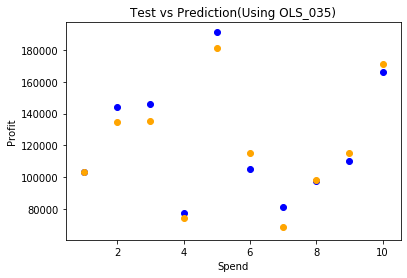

In [10]:
y_OLS = regressor_OLS.predict(exog=x_test[:, [0, 3, 5]])

plt.scatter(np.array([1,2,3,4,5,6,7,8,9,10]), y_test, color = 'blue')
plt.scatter(np.array([1,2,3,4,5,6,7,8,9,10]), y_OLS, color = 'orange')
plt.title("Test vs Prediction(Using OLS_035)")
plt.xlabel("Spend"), plt.ylabel("Profit")
plt.show()